### Introduction to K-Means Clustering 
#### K-Means is an unsupervised machine learning algorithm used to group data points into clusters.
#### It works iteratively to assign each data point to one of the K clusters based on similarity.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data points as given in the problem
x1 = np.array([1, 2, 2, 3, 4, 5])
x2 = np.array([1, 1, 3, 2, 3, 5])
data = np.column_stack((x1, x2))

# Number of clusters
k = 2

# Step 1: Initialize centroids (randomly select k points from data)
np.random.seed(22)  # For reproducibility
centroids = data[np.random.choice(data.shape[0], k, replace=False)]
centroids

array([[2, 1],
       [2, 3]])

In [3]:
# Function to compute Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

- ### For each data point, calculate its distance to each centroid.
- ### Assign the data point to the cluster of the nearest centroid.

In [5]:
# Function to assign clusters based on closest centroids
def assign_clusters(data, centroids):
    """Assign each data point to the closest centroid."""
   
    clusters = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids] #list comprehension
        clusters.append(np.argmin(distances))  # Index of the closest centroid
    return np.array(clusters) 



In [6]:
# Function to compute new centroids as mean of assigned clusters

def compute_centroids(data, clusters, k, prev_centroids=None, tolerance=1e-4):
    """Compute new centroids as the mean of points in each cluster and terminate if centroids do not change."""
    new_centroids = []
    for i in range(k):
        cluster_points = data[clusters == i]  # Points in cluster i
        if len(cluster_points) > 0:  # Check to avoid empty clusters
            new_centroids.append(cluster_points.mean(axis=0))  # Mean of points
        else:
            new_centroids.append(np.zeros(data.shape[1]))  # Handle empty cluster case
    
    new_centroids = np.array(new_centroids)

    # If centroids have not changed (based on a given tolerance), break the loop
    if prev_centroids is not None and np.all(np.abs(new_centroids - prev_centroids) < tolerance):
        return new_centroids, True  # Return new centroids and a flag indicating convergence
    
    return new_centroids, False  # Return new centroids and a flag indicating no convergence yet


# Summary 
#### 1. Randomly initialized centroids were chosen.
#### 2. Data points were assigned to the closest centroid to form clusters.
#### 3. Centroids were updated iteratively until convergence.
#### 4. Final clusters and centroids are visualized for better understanding.


Starting K-Means Clustering...
Convergence reached after 3 iterations.

Final Centroids: [[2.   1.75]
 [4.5  4.  ]]
Cluster Assignments: [0 0 0 0 1 1]


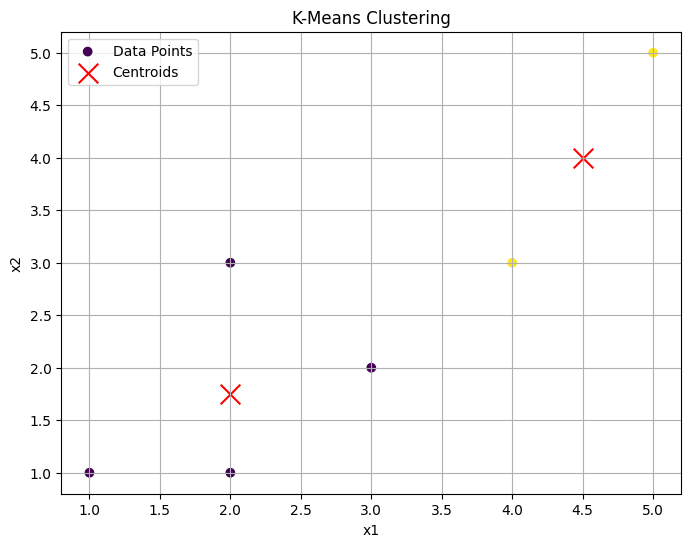

In [7]:
# Initial setup
prev_centroids = np.zeros_like(centroids)  # Initialize previous centroids for comparison
max_iterations = 100
iteration = 0
converged = False
tolerance = 1e-4  # Threshold for convergence

print("Starting K-Means Clustering...")

# Step 2: Iterate until convergence
while iteration < max_iterations and not converged:
    # Assign clusters
    clusters = assign_clusters(data, centroids)

    # Compute new centroids
    new_centroids, converged = compute_centroids(data, clusters, k, prev_centroids, tolerance)
    
    # Check if centroids have converged
    if converged:
        print(f"Convergence reached after {iteration + 1} iterations.")
        break

    # Update centroids for the next iteration
    centroids = new_centroids
    prev_centroids = new_centroids  # Update previous centroids for next iteration
    iteration += 1

# Final output
print("\nFinal Centroids:", centroids)
print("Cluster Assignments:", clusters)

# Visualization of the results
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', marker='o', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()
